# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [63]:
# Load the Airbnb data set
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename)

In [64]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### a. Reduce size of dataframe

In [5]:
# Identify columns with highest correlation
corrs_sorted = df.corr()['review_scores_rating'].sort_values(ascending=False)# YOUR CODE HERE
corrs_sorted

review_scores_rating                            1.000000
review_scores_value                             0.820631
review_scores_cleanliness                       0.758213
review_scores_communication                     0.727749
review_scores_checkin                           0.688152
review_scores_location                          0.574464
host_response_rate                              0.121477
number_of_reviews_l30d                          0.067435
number_of_reviews                               0.067182
n_host_verifications                            0.050888
number_of_reviews_ltm                           0.045595
price                                           0.045067
reviews_per_month                               0.039317
has_availability                                0.030396
host_acceptance_rate                            0.012542
bedrooms                                        0.011528
accommodates                                    0.007798
beds                           

In [6]:
# Reduce size of dataframe by only keeping relevant features
columns_to_keep = ['review_scores_rating', 'host_response_rate','n_host_verifications', 'price', 'room_type', 'host_acceptance_rate', 'bedrooms', 'accommodates', 'beds', 'bathrooms']
df = df[columns_to_keep]
df.head()

,review_scores_rating,host_response_rate,n_host_verifications,price,room_type,host_acceptance_rate,bedrooms,accommodates,beds,bathrooms
0,4.70,0.80,9,150.0,Entire home/apt,0.17,NaN,1,1.0,1.0
1,4.45,0.09,6,75.0,Entire home/apt,0.69,1.0,3,3.0,1.0
2,5.00,1.00,3,275.0,Entire home/apt,0.25,2.0,4,2.0,1.5
3,4.21,1.00,4,68.0,Private room,1.00,1.0,2,1.0,1.0
4,4.91,NaN,7,75.0,Private room,NaN,1.0,1,1.0,1.0


### b. Address missing values

In [7]:
# Check number of missing values
nan_count = np.sum(df.isnull(), axis=0) # sum all null vals by col
nan_count

review_scores_rating        0
host_response_rate      11843
n_host_verifications        0
price                       0
room_type                   0
host_acceptance_rate    11113
bedrooms                 2918
accommodates                0
beds                     1354
bathrooms                   0
dtype: int64

In [8]:
# Find mean values for columns with missing values
mean_host_response_rate, mean_host_acceptance_rate = df['host_response_rate'].mean(), df['host_acceptance_rate'].mean()
mean_bedrooms, mean_beds = df['bedrooms'].mean(), df['beds'].mean()

# Fill missing values with mean values
df['host_response_rate'].fillna(value=mean_host_response_rate, inplace=True)
df['host_acceptance_rate'].fillna(value=mean_host_acceptance_rate, inplace=True)
df['bedrooms'].fillna(value=mean_bedrooms, inplace=True)
df['beds'].fillna(value=mean_beds, inplace=True)

In [9]:
df.head()

,review_scores_rating,host_response_rate,n_host_verifications,price,room_type,host_acceptance_rate,bedrooms,accommodates,beds,bathrooms
0,4.70,0.800000,9,150.0,Entire home/apt,0.170000,1.329708,1,1.0,1.0
1,4.45,0.090000,6,75.0,Entire home/apt,0.690000,1.000000,3,3.0,1.0
2,5.00,1.000000,3,275.0,Entire home/apt,0.250000,2.000000,4,2.0,1.5
3,4.21,1.000000,4,68.0,Private room,1.000000,1.000000,2,1.0,1.0
4,4.91,0.906901,7,75.0,Private room,0.791953,1.000000,1,1.0,1.0


### c. One-hot encode categorical values

In [10]:
# Find columns with object data type
to_encode = list(df.select_dtypes(include=['object'])) # only 'room_type' is an object

# Get a list of all room types
room_types = list(df['room_type'].value_counts().index)

# Create one-hot encode columns for each room type
for value in room_types:
    df['room_type_'+ value.lower().replace(' ', '_')] = np.where(df['room_type']==value,1,0)

df.drop(columns = 'room_type', inplace=True)

df.head()

,review_scores_rating,host_response_rate,n_host_verifications,price,host_acceptance_rate,bedrooms,accommodates,beds,bathrooms,room_type_entire_home/apt,room_type_private_room,room_type_shared_room,room_type_hotel_room
0,4.70,0.800000,9,150.0,0.170000,1.329708,1,1.0,1.0,1,0,0,0
1,4.45,0.090000,6,75.0,0.690000,1.000000,3,3.0,1.0,1,0,0,0
2,5.00,1.000000,3,275.0,0.250000,2.000000,4,2.0,1.5,1,0,0,0
3,4.21,1.000000,4,68.0,1.000000,1.000000,2,1.0,1.0,0,1,0,0
4,4.91,0.906901,7,75.0,0.791953,1.000000,1,1.0,1.0,0,1,0,0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### a. Create training and testing data sets

In [11]:
# Create Labeled Examples
X = df.drop(columns='review_scores_rating', axis=0)
y = df['review_scores_rating']

In [12]:
# Split labeled examples into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### b. Linear regression model

<b>Analysis</b>: The linear regression model has a reasonable level of prediction accuracy, but the extremely R^2 indicates that this model is not best suited for capturing the complex relationships in the data

In [28]:
# Create linear regression model and fit to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# Make predictions on the test data and compute RMSE/R^2
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

# Print RMSE and R^2
print('[LR] RMSE: {:.4f}'.format(lr_rmse))
print('[LR]  R^2: {:.4f}'.format(lr_r2))

[LR] RMSE: 0.4970
[LR]  R^2: 0.0244


### c. Create Decision Tree Regression Model

<b>Analysis</b>: The decision tree regression model has a reasonable level of prediction accuracy, but the extremely low R^2 indicates that this model is not best suited for capturing the complex relationships in the data. Although the RMSE is lower than the linear regression model, it has a better R^2.

In [34]:
# Parameters for Grid Search
param_grid = {
    'max_depth': [2**i for i in list(range(10))],
    'min_samples_leaf': [2**i for i in list(range(10))]
}

# Create a DecisionTreeRegressor model and run a Grid Search with 3-fold cross-validation
dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, param_grid, cv = 3, scoring='neg_root_mean_squared_error')# YOUR CODE HERE
dt_grid_search = dt_grid.fit(X_train, y_train)

# Save best parameters to dt_best_params
dt_best_params = dt_grid_search.best_params_

In [36]:
# Create final DecisionTreeRegressor regression model and fit to training data
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

# Make predictions on the test data and compute RMSE/R^2
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

# Print RMSE and R^2
print('[DT] RMSE: {:.4f}'.format(dt_rmse))
print('[DT]  R^2: {:.4f}'.format(dt_r2))

[DT] RMSE: 0.4934
[DT]  R^2: 0.0384


### d. Create Gradient Boosting Regression Model

In [49]:
# Parameters for Grid Search
param_grid = {
    'n_estimators': [100, 300, 700],
    'max_depth': [2, 4, 8, 16, 32]
}

# Create a GradientBoostingRegressor model and run a Grid Search with 3-fold cross-validation
gbdt_regressor = GradientBoostingRegressor()
gbdt_grid = GridSearchCV(gbdt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)

# Save best parameters to gbdt_best_params
gbdt_best_params = gbdt_grid_search.best_params_

In [50]:
# Create final GradientBoostingRegressor model with best parameters and fit to training data
gbdt_model = GradientBoostingRegressor(
    n_estimators=gbdt_best_params['n_estimators'],
    max_depth=gbdt_best_params['max_depth']
)
gbdt_model.fit(X_train, y_train)

# Make predictions on the test data and compute RMSE/R^2
y_gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

# Print RMSE and R^2
print('[GBDT] RMSE: {:.4f}'.format(gbdt_rmse))
print('[GBDT] R^2: {:.4f}'.format(gbdt_r2))

[GBDT] RMSE: 0.4920
[GBDT] R^2: 0.0441


### e. Create Random Forest Regression Model

In [51]:
# Parameters for Grid Search
param_grid = {
    'n_estimators': [100, 300, 700],
    'max_depth': [2, 4, 8, 16, 32]
}

# Create a GradientBoostingRegressor model and run a Grid Search with 3-fold cross-validation
rf_regressor = RandomForestRegressor()
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)

# Save best parameters to gbdt_best_params
rf_best_params = rf_grid_search.best_params_

In [52]:
# Create final RandomForest model with best parameters and fit to training data
rf_model = RandomForestRegressor(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth']
)
rf_model.fit(X_train, y_train)

# Make predictions on the test data and compute RMSE/R^2
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

# Print RMSE and R^2
print('[RF] RMSE: {:.4f}'.format(rf_rmse))
print('[RF] R^2: {:.4f}'.format(rf_r2))

[RF] RMSE: 0.4910
[RF] R^2: 0.0479


### f. Visualize results

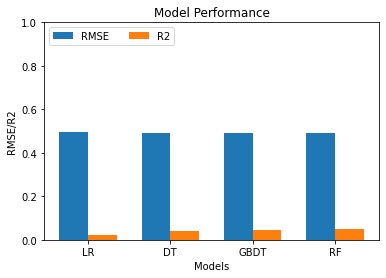

In [53]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['LR', 'DT', 'GBDT', 'RF']

rg= np.arange(4)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

### g. Create stacking regressor model using previous models

In [54]:
estimators_best = [("DT", dt_model),
              ("RF", rf_model),
              ("GBDT", gbdt_model),
              ("LR", lr_model)
             ]

In [58]:
s_model = StackingRegressor(estimators = estimators_best, cv = 3, passthrough=False)
s_model.fit(X_train, y_train)

StackingRegressor(cv=3,
                  estimators=[('DT',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=8,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=128,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                    

In [59]:
s_y_pred = s_model.predict(X_test)
s_rmse = mean_squared_error(y_test, s_y_pred, squared=False)
s_r2 = r2_score(y_test, s_y_pred)

print('[GBDT] RMSE: {:.4f}'.format(s_rmse))
print('[GBDT] R^2: {:.4f}'.format(s_r2)) 

[GBDT] RMSE: 0.4899
[GBDT] R^2: 0.0519


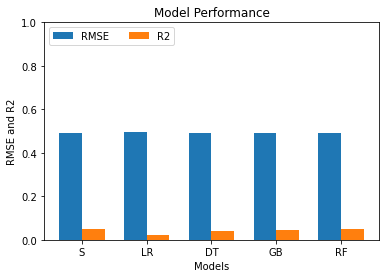

In [62]:
RMSE_Results = [s_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [s_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
# YOUR CODE HERE
plt.bar(rg, RMSE_Results, width, label='RMSE')

# 2. Create bar plot with R2 results
# YOUR CODE HERE
plt.bar(rg + width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
# YOUR CODE HERE
plt.xticks(rg + width / 2, ['S', 'LR', 'DT', 'GB', 'RF'])

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
# YOUR CODE HERE
plt.xlabel('Models')
plt.ylabel('RMSE and R2')

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

## Summarizing Findings

The stacking model performed the best out of the 5 models. However, the models do not have a high R^2 value. That means that the models are not good at dealing with variation in the data. There could be more features that impact Airbnb ratings like location, and additional information not included in the dataset (amenities, decor, cleanliness rating not by the customers, etc.). In addition, the average rating of the Airbnbs in the dataset is 4.6, which is high and count explain why the model cannot effectively reason variation in the data.